In [1]:
pip show matplotlib

Name: matplotlib
Version: 3.7.5
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: d:\anaconda\envs\mathmodel\lib\site-packages
Requires: contourpy, cycler, fonttools, importlib-resources, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: filterpy, missingno, PDPbox, seaborn
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show plotly

Name: plotly
Version: 5.24.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: d:\anaconda\envs\mathmodel\lib\site-packages
Requires: packaging, tenacity
Required-by: PDPbox
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show xgboost

Name: xgboost
Version: 2.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: d:\anaconda\envs\mathmodel\lib\site-packages
Requires: numpy, scipy
Required-by: PDPbox
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show warnings

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip show missingno

Name: missingno
Version: 0.5.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: MIT License
Location: d:\anaconda\envs\mathmodel\lib\site-packages
Requires: matplotlib, numpy, scipy, seaborn
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
# 导入包
import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x:"%.2f" % x)# 设置全局选项 保留两位小数的浮点数

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno  # 可视化工具

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,roc_auc_score,roc_curve,recall_score,accuracy_score,classification_report 
# classification_report分类报告
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import imblearn
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [20]:
# 设置字体和负号显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [121]:
data = pd.read_csv('3-creditcard.csv')
data.shape

(284807, 31)

In [122]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


Time特征，是所有交易与第一个交易的时间间隔    ---这个数据是以秒s为单位的
V1-V28特征，是PCA后的特征，因为需要保密，所以不知道原始信息
Amount特征，是交易金额
Class是标签，1代表欺诈交易，0代表正常交易

##  数据分析

In [123]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [16]:
data.isnull().sum() # 通过结果发现这个数据集很好

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
data.duplicated().sum()

1081

In [27]:
data['Time'].sample(10)

133030    80216.00
68355     52952.00
156918   109197.00
162046   114779.00
18735     29728.00
158696   111647.00
73544     55180.00
156270   107704.00
22322     32175.00
106295    69910.00
Name: Time, dtype: float64

In [124]:
# 特征Time的单为秒，我们将其转化为以小时为单位对应每天的时间
data['Hour'] = data['Time'].apply(lambda x:divmod(x,3600)[0])
# 内置函数，用于将 x（秒）除以 3600（一小时的秒数），并返回一个元组，其中包含商（小时数）和余数（秒）
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
127005,78177.00,-2.73,1.64,-0.15,-0.54,1.57,-1.93,-5.33,-4.20,-0.41,...,0.43,-4.12,0.79,-1.74,0.68,0.31,0.37,2.00,0,21.00
96394,65751.00,-2.75,-7.02,-1.68,1.67,-2.52,1.47,1.98,-0.25,0.72,...,-1.63,-1.92,-0.78,-0.48,0.75,-0.43,0.35,2080.08,0,18.00
245081,152599.00,-0.66,-0.91,-1.94,-2.73,0.42,-0.21,1.00,0.06,-3.41,...,0.73,-0.05,-0.32,1.15,0.31,-0.27,-0.19,235.30,0,42.00
17639,28834.00,-2.54,-1.81,3.53,3.72,0.63,1.74,-1.72,1.03,0.29,...,1.26,1.15,-0.25,0.34,0.63,0.24,0.03,10.63,0,8.00
207032,136489.00,-3.17,0.42,-1.30,-0.89,-0.56,1.57,0.90,1.15,-2.38,...,-0.11,-0.90,-1.61,0.87,-0.41,-0.53,-0.39,290.85,0,37.00


In [22]:
import pandas as pd

# 创建示例 DataFrame
data = {
    'Time': [3600, 7200, 10800, 14400, 18000, 21600, 25200, 28800, 32400, 36000]
}
data_df = pd.DataFrame(data)

# 将 'Time' 列的秒转换为小时
data_df['Hour'] = data_df['Time'].apply(lambda x: divmod(x, 3600)) #

# 随机选择 5 行数据
sampled_data = data_df.sample(5)

# 显示结果
print(sampled_data)

    Time    Hour
2  10800  (3, 0)
6  25200  (7, 0)
5  21600  (6, 0)
3  14400  (4, 0)
0   3600  (1, 0)


In [29]:
print('{:-^29}'.format('Normal'))
print(data.Time[data.Class==0].describe())

print('{:-^29}'.format('Fraud'))
print(data.Time[data.Class==1].describe())

-----------Normal------------
count   284315.00
mean     94838.20
std      47484.02
min          0.00
25%      54230.00
50%      84711.00
75%     139333.00
max     172792.00
Name: Time, dtype: float64
------------Fraud------------
count      492.00
mean     80746.81
std      47835.37
min        406.00
25%      41241.50
50%      75568.50
75%     128483.00
max     170348.00
Name: Time, dtype: float64


{:-^29}格式化说明符解释：
:：表示这是格式化字段的开始。
-：表示文本居中对齐。
^：表示文本居中对齐（在 str.format() 中与 - 相同）。
29：表示字段的总宽度为 29 个字符。
}：表示字段的结束

In [47]:
data.Time[data.Class==1].value_counts(ascending=True)

Time
406.00       1
102572.00    1
102542.00    1
102489.00    1
102480.00    1
            ..
93860.00     4
85285.00     4
84204.00     4
93879.00     4
68207.00     6
Name: count, Length: 468, dtype: int64

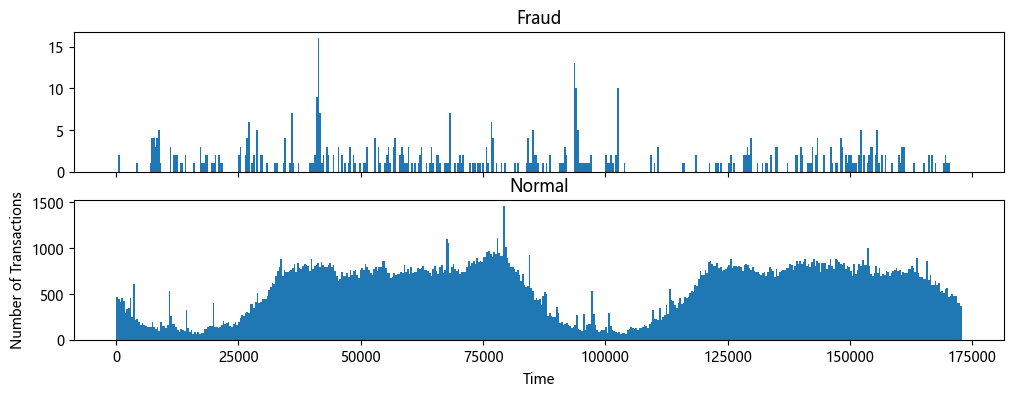

In [52]:
# 直方图   Y 轴表示频数或频率
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

bins = 500

ax1.hist(data.Time[data.Class==1], bins=bins) # 欺诈交易 
ax1.set_title("Fraud")

ax2.hist(data.Time[data.Class==0], bins=bins) # 正常交易
ax2.set_title("Normal")

plt.xlabel('Time')
plt.ylabel('Number of Transactions')
# plt.legend()
plt.show()

In [53]:
print('{:-^29}'.format("Normal"))
print(data.Amount[data.Class==0].describe())
print("")
print('{:-^29}'.format("Fraud"))
print(data.Amount[data.Class==1].describe())

-----------Normal------------
count   284315.00
mean        88.29
std        250.11
min          0.00
25%          5.65
50%         22.00
75%         77.05
max      25691.16
Name: Amount, dtype: float64

------------Fraud------------
count    492.00
mean     122.21
std      256.68
min        0.00
25%        1.00
50%        9.25
75%      105.89
max     2125.87
Name: Amount, dtype: float64


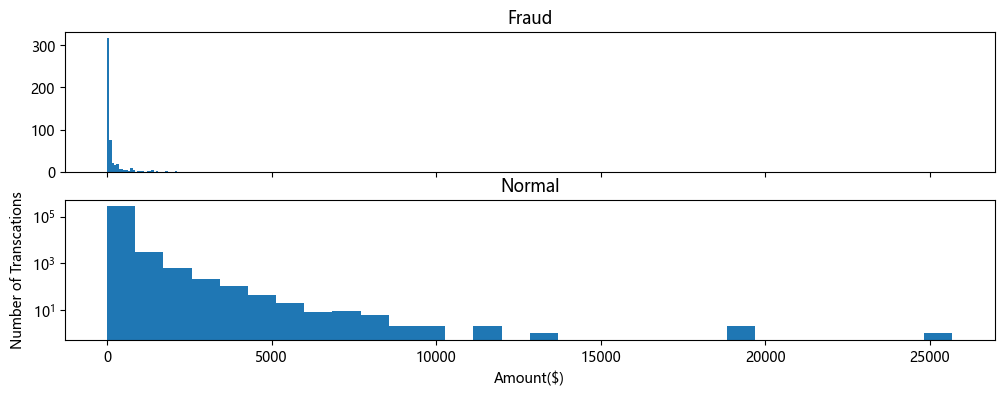

In [57]:
f1, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

bins = 30


ax3.hist(data.Amount[data.Class==1], bins=bins)
ax3.set_title("Fraud")

ax4.hist(data.Amount[data.Class==0], bins=bins)
ax4.set_title("Normal")


plt.xlabel("Amount($)")
plt.ylabel("Number of Transcations")
plt.yscale("log")
plt.show()

对数刻度是一种非线性刻度，它将数据的乘法关系转换为加法关系，使得在图表上可以更清晰地展示跨越多个数量级的数据。这种刻度特别适合处理数据值范围很广的情况，因为它可以压缩高值，使得低值和高值之间的差异更容易观察。

In [14]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [58]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

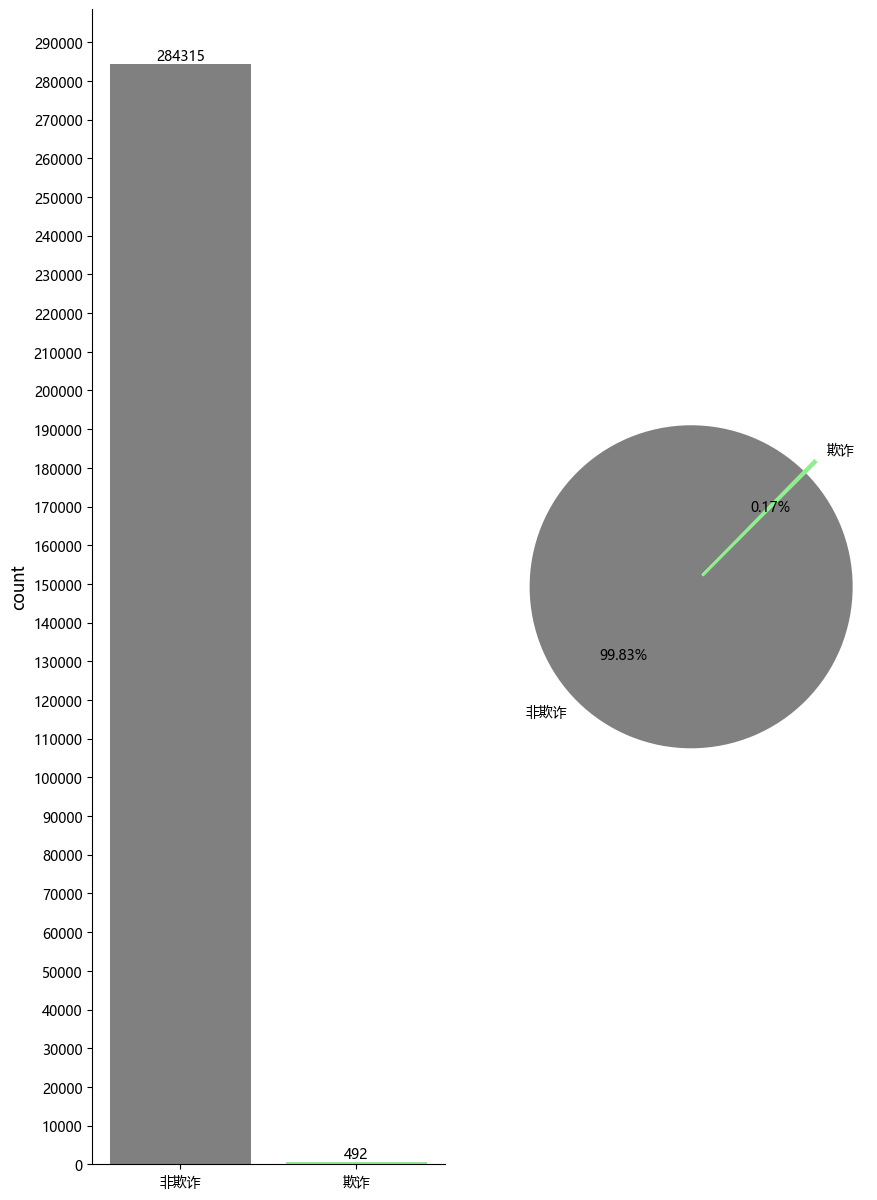

In [88]:
import matplotlib.ticker as ticker
# 交易类型数据
data_f = pd.DataFrame({
    'fraud': [0, 1],
    'count': [284315, 492]
})

# 替换数据中的值
df_t = data_f.copy()
df_t.replace({0: '非欺诈', 1: '欺诈'}, inplace=True) #原数据集 

# 定义颜色
colors = ['#808080', '#90EE90']  # 灰色和浅绿色


# 创建图形
fig = plt.figure(figsize=(10, 15))

# 条形图  -- 子图 
ax1 = fig.add_subplot(1, 2, 1)
# ax1.spines 是一个属性，它返回一个字典，包含对轴边框（spines）的引用
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 生成条形图，使用 `palette` 直接指定颜色
sns.barplot(x="fraud", y="count", data=df_t, palette=colors, ax=ax1)
plt.xlabel('')
plt.ylabel('count', fontdict={'fontsize': 12})
# 设置y轴刻度
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10000))

# 在每个柱子上方显示数值
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() / 2, p.get_height(), 
             f'{p.get_height():.0f}',  # 格式化数值，去除小数点
             ha='center', va='bottom')
# -----------------------------------------------------------------#
# 饼图
ax2 = fig.add_subplot(1, 2, 2)
# 绘制饼图   explode=[0.1, 0]：指定第一个扇区突出显示，偏移量为 0.1（即 10%）
wedges, texts, autotexts = plt.pie(x=df_t['count'], labels=df_t['fraud'], autopct='%1.2f%%', explode=[0.1, 0],
        startangle=45, counterclock=False, colors=colors, wedgeprops={'linewidth': 2, 'edgecolor': 'yellow'})

可选：调整边缘颜色
for i, wedge in enumerate(wedges):
    wedge.set_edgecolor(colors[i])  # 设置每个扇区的边缘颜色
    
plt.axis('square')

# 显示图形
plt.show()

b

##  信用卡正常与被盗刷用户分析

In [94]:
# 获取数据
fraud = data[data['Class'] == 1]
nonFraud = data[data['Class'] == 0]

# 相关性计算
correlationNonFraud = nonFraud.loc[:, data.columns != 'Class'].corr()
correlationFraud = fraud.loc[:, data.columns != 'Class'].corr()

# 上三角矩阵设置
mask = np.zeros_like(correlationNonFraud)# 全部设置0
indices = np.triu_indices_from(correlationNonFraud)#返回函数的上三角矩阵  两个数组 一个行索引 一个列索引
mask[indices] = True


In [104]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

import numpy as np

# 假设 correlationNonFraud 是一个 3x3 相关性矩阵
correlationNonFraud = np.array([
    [1, 0.5, 0.2],
    [0.5, 1, 0.3],
    [0.2, 0.3, 1]
])

# 创建掩码数组
mask = np.zeros_like(correlationNonFraud)
mask

# 获取上三角索引
indices = np.triu_indices_from(correlationNonFraud)
indices 
# 第一个数组包含上三角部分的行索引。
# 第二个数组包含上三角部分的列索引。

# 设置掩码值
mask[indices] = True

# 显示掩码数组
print("掩码数组:")
print(mask)
掩码数组:
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]

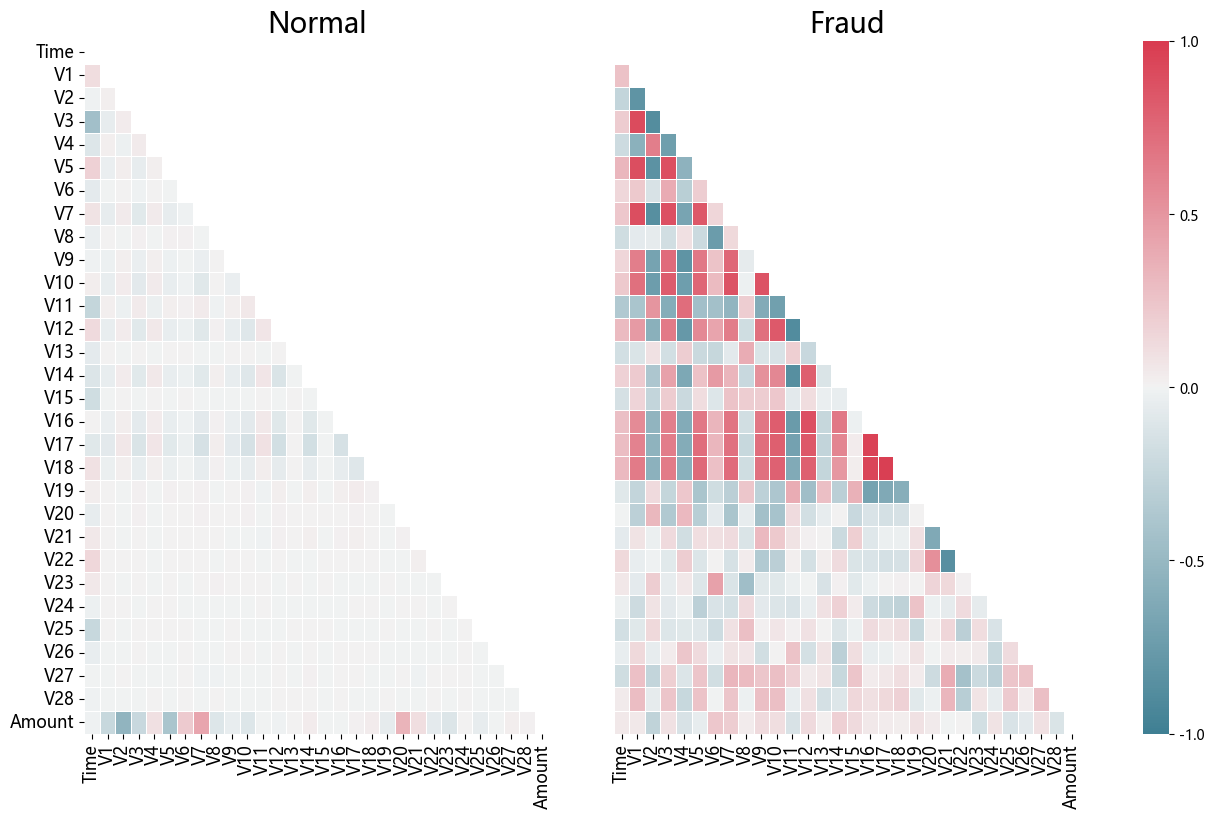

In [103]:
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
# 置了三个子图的宽度比例，分别为 0.9、0.9 和 0.05，以及子图之间的水平间距为 0.2
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

# 正常用户-特征相关性展示
cmap = sns.diverging_palette(220, 8, as_cmap=True) # 颜色映射，用于热力图的颜色渐变
# vmin = -1, vmax = 1热力图的颜色映射范围。
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)

ax1.set_xticklabels(ax1.get_xticklabels(), size = 12); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 12); 
ax1.set_title('Normal', size = 20)

# 被欺诈的用户-特征相关性展示
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 12); 
ax2.set_title('Fraud', size = 20);

# 共用一个y轴图像  


plt.show()

从上图可以看出，信用卡被盗刷的事件中，部分变量之间的相关性更明显。

其中变量V1、V2、V3、V4、V5、V6、V7、V9、V10、V11、V12、V14、V16、V17和V18以及V19之间的变化在信用卡被盗刷的样本中呈性一定的规律。

##  是否欺诈和交易金额关系分析

In [114]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Fraud transactions in each bin: [492]
Normal transactions in each bin: [284315]


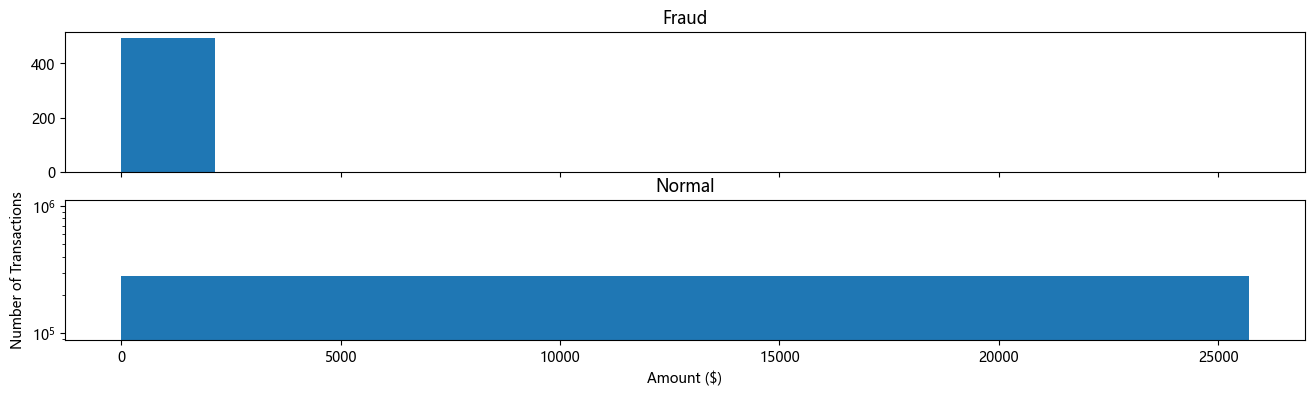

In [116]:
# 计算欺诈交易的直方图
bins = 1
fraud_hist_values, fraud_bin_edges = np.histogram(data["Amount"][data["Class"] == 1], bins=bins)

# 计算正常交易的直方图
normal_hist_values, normal_bin_edges = np.histogram(data["Amount"][data["Class"] == 0], bins=bins)

# 打印每个 bin 中的数据点数量
print("Fraud transactions in each bin:", fraud_hist_values)
print("Normal transactions in each bin:", normal_hist_values)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4)) # 共享x轴
bins = 1

ax1.hist(data["Amount"][data["Class"]== 1], bins = bins)

ax1.set_title('Fraud')

ax2.hist(data["Amount"][data["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


信用卡被盗刷发生的金额与信用卡正常用户发生的金额相比呈现散而小的特点

这说明信用卡盗刷者为了不引起信用卡卡主的注意，更偏向选择小金额消费。

## 消费和时间关系分析

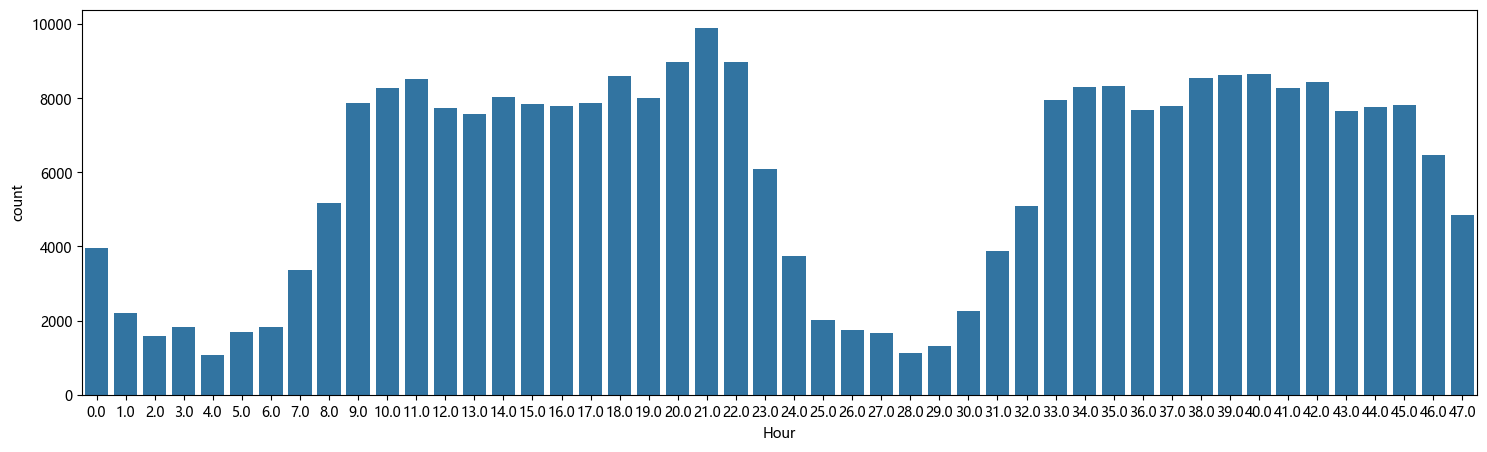

In [130]:
# 每个小时交易次数
plt.figure(figsize=(18,5))
sns.countplot(x="Hour", data=data)
plt.show()

##  V1-V28 字段分析


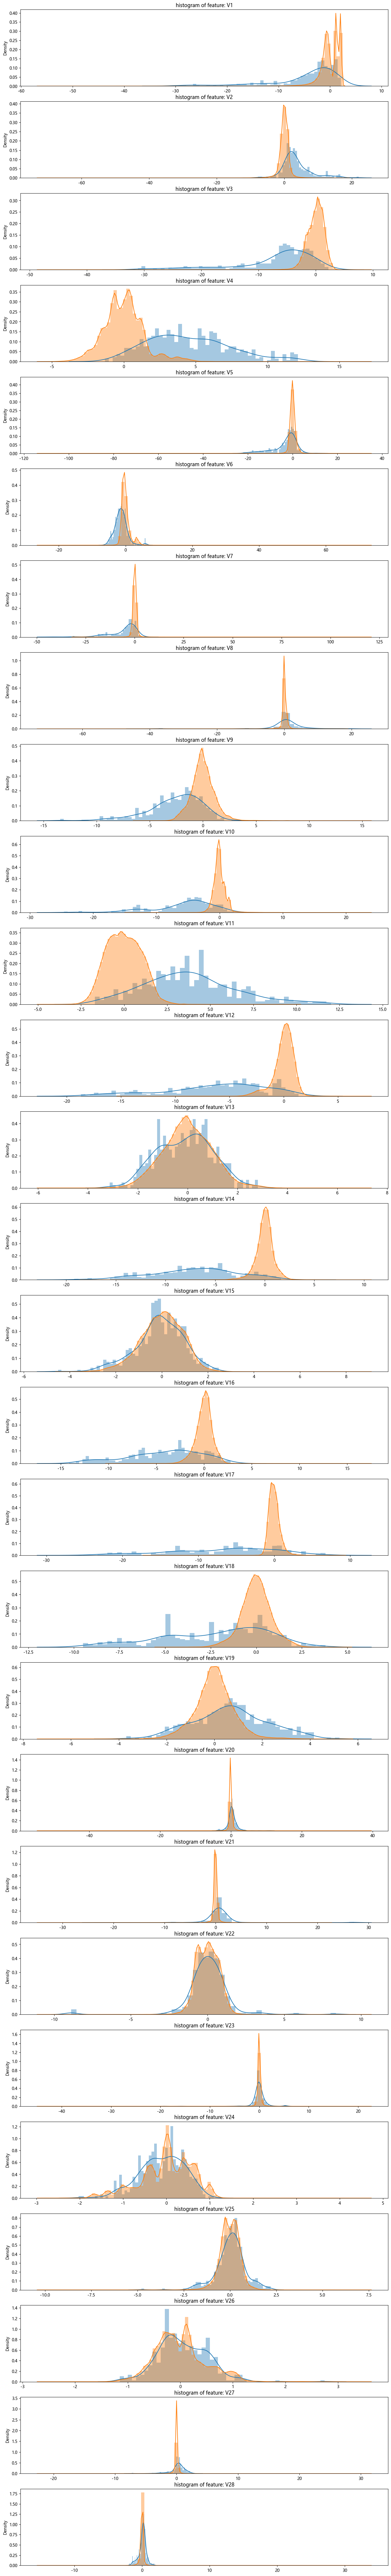

In [136]:
# 获取V1-V28 字段

v_feat_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
         'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
v_feat_col_size = len(v_feat_col)


plt.figure(figsize=(16,v_feat_col_size*4))

gs = gridspec.GridSpec(v_feat_col_size, 1) # 定义一个网格 允许子图（axes）放置在网格的特定位置
for i, cn in enumerate(data[v_feat_col]):
    
    ax = plt.subplot(gs[i])
    #  kde=True, 默认的使用方式
    sns.distplot(data[cn][data["Class"] == 1], bins=50)# V1 异常  蓝色表示
    sns.distplot(data[cn][data["Class"] == 0], bins=100)# V1 正常  橘色表示
    ax.set_xlabel('')  # 由这句话  否则用V1  代替显示
    ax.set_title('histogram of feature: ' + str(cn))
    # break


In [ ]:
不同信用卡状态（1-盗刷；0-正常）下的分布有明显区别的变量，选择有明显区分度的特征。
从上述图分析：因此剔除变量V8、V13 、V15 、V20 、V21 、V22、 V23 、V24 、V25 、V26 、V27 和V28变量 （这些特征不能很好的区分类别）

In [142]:
# 同时删除Time：保留Hour字段
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_df_new = data.drop(droplist, axis = 1)
print(data_df_new.shape) #特征从31个缩减至18个（不含目标变量）
data_df_new.tail()

(284807, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,1.91,4.36,-1.59,2.71,4.63,1.11,1.99,0.51,-0.68,0.77,0,47.00
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.58,-0.98,-0.15,0.92,-0.68,-0.71,-0.03,-1.22,-1.55,24.79,0,47.00
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.43,-0.48,0.41,0.06,-0.51,0.14,0.31,0.40,-0.58,67.88,0,47.00
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.39,-0.40,-1.93,-0.96,0.45,-0.61,0.51,1.11,2.90,10.00,0,47.00
284806,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,0.49,-0.92,-1.04,-0.03,-0.08,-0.30,-0.66,0.17,-0.26,217.00,0,47.00


##  特征工程
特征Hour和Amount的规格和其他特征相差较大，其进行特征缩放

In [143]:
data_df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.36,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0.40,149.62,0,0.00
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,-0.26,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,-0.15,2.69,0,0.00
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,-1.51,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,-2.26,378.66,0,0.00
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,-1.39,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,1.97,-1.23,123.50,0,0.00
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,0.82,0.75,-0.82,0.54,-1.12,-0.45,-0.24,-0.04,0.80,69.99,0,0.00


In [144]:
data_df_new.shape

(284807, 19)

In [145]:
data_df_new.tail()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,1.91,4.36,-1.59,2.71,4.63,1.11,1.99,0.51,-0.68,0.77,0,47.00
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.58,-0.98,-0.15,0.92,-0.68,-0.71,-0.03,-1.22,-1.55,24.79,0,47.00
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.43,-0.48,0.41,0.06,-0.51,0.14,0.31,0.40,-0.58,67.88,0,47.00
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.39,-0.40,-1.93,-0.96,0.45,-0.61,0.51,1.11,2.90,10.00,0,47.00
284806,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,0.49,-0.92,-1.04,-0.03,-0.08,-0.30,-0.66,0.17,-0.26,217.00,0,47.00


In [146]:
# 对Amount和Hour 进行特征缩放
col = ['Amount','Hour']
# from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器 作用：去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本
data_df_new[col] =sc.fit_transform(data_df_new[col])#对数据进行标准化
data_df_new.tail()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,1.91,4.36,-1.59,2.71,4.63,1.11,1.99,0.51,-0.68,-0.35,0,1.60
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.58,-0.98,-0.15,0.92,-0.68,-0.71,-0.03,-1.22,-1.55,-0.25,0,1.60
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.43,-0.48,0.41,0.06,-0.51,0.14,0.31,0.40,-0.58,-0.08,0,1.60
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.39,-0.40,-1.93,-0.96,0.45,-0.61,0.51,1.11,2.90,-0.31,0,1.60
284806,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,0.49,-0.92,-1.04,-0.03,-0.08,-0.30,-0.66,0.17,-0.26,0.51,0,1.60


In [147]:
data_df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59
V10,284807.00,0.00,1.09,-24.59,-0.54,-0.09,0.45,23.75
V11,284807.00,0.00,1.02,-4.80,-0.76,-0.03,0.74,12.02


## 特征重要性分析
利用随机森林的feature importance对特征的重要性进行排序

In [148]:
data_df_new.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'Amount', 'Class', 'Hour'],
      dtype='object')

In [150]:
x_feature = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount',  'Hour']
x_val = data_df_new[x_feature]
y_val = data_df_new['Class']

In [151]:
#构建分类随机森林分类器
clf=RandomForestClassifier(n_estimators=10,random_state=42,max_depth=4)
clf.fit(x_val, y_val) #对自变量和因变量进行拟合
for feature in zip(x_feature,clf.feature_importances_):
    print(feature)

('V1', 0.0038989752714058486)
('V2', 0.0027038871454469217)
('V3', 0.026952559757713098)
('V4', 0.02159376763527073)
('V5', 0.01798767663560397)
('V6', 0.0005289202626423892)
('V7', 0.03184662339558151)
('V9', 0.012345829031178873)
('V10', 0.0917851429181416)
('V11', 0.0068039329696330765)
('V12', 0.20512839327084872)
('V14', 0.13941079529437903)
('V16', 0.12561363630520125)
('V17', 0.26507827141261814)
('V18', 0.03456786771378745)
('V19', 0.0005833168045762355)
('Amount', 0.006863681529958022)
('Hour', 0.006306722646013179)


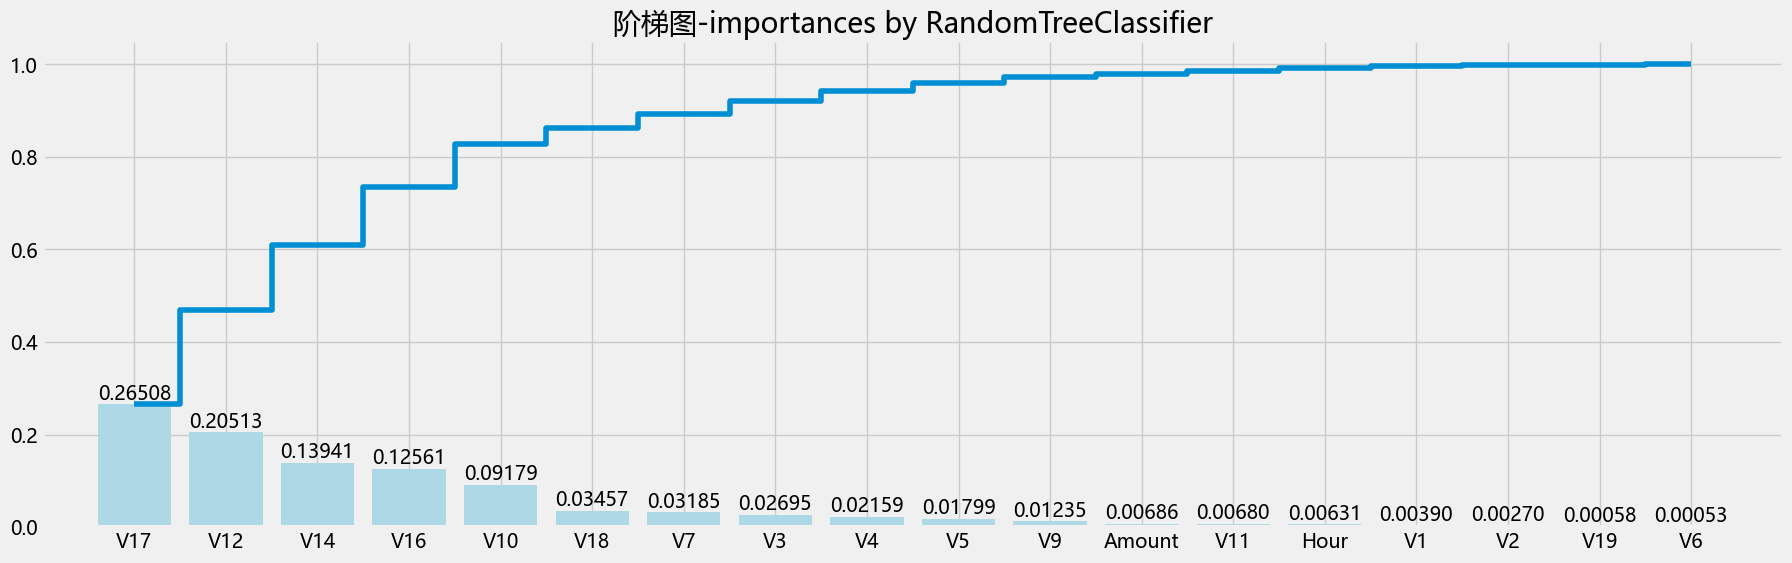

In [174]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化 
importances = clf.feature_importances_
feat_names = data_df_new[x_feature].columns
# 对特征重要性进行降序排序，并获取排序后的索引
indices = np.argsort(importances)[::-1]

fig = plt.figure(figsize=(20,6))
plt.title("阶梯图-importances by RandomTreeClassifier")

x = list(range(len(indices)))

bars = plt.bar(x, importances[indices], color='lightblue',  align="center")
# 在每个条形上方添加特征名称
for bar, label in zip(bars, importances[indices]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{label:.5f}",
             ha='center', va='bottom', fontsize=14, color='black')
    
plt.step(x, np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(x, feat_names[indices],fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

以下是参数的详细解释：

x：这是阶梯图的 x 坐标，通常是一个数字列表，表示每个阶梯的位置。

np.cumsum(importances[indices])：这是 numpy 库中的 cumsum 函数，它计算数组中元素的累积和。在这里，它被用来计算特征重要性的累积和，indices 是特征重要性排序后的索引。

where='mid'：这个参数指定了阶梯图的台阶应该位于每个区间的哪个位置。'mid' 表示台阶位于每个区间的中间位置，这意味着每个阶梯的高度将从当前点跳到下一个点，然后在下一个点保持水平。

label='Cumulative'：这是为阶梯图设置的图例标签，表示这个阶梯图代表的是累积和。

In [160]:
importances

array([0.00389898, 0.00270389, 0.02695256, 0.02159377, 0.01798768,
       0.00052892, 0.03184662, 0.01234583, 0.09178514, 0.00680393,
       0.20512839, 0.1394108 , 0.12561364, 0.26507827, 0.03456787,
       0.00058332, 0.00686368, 0.00630672])

In [170]:
importances[indices]

array([0.26507827, 0.20512839, 0.1394108 , 0.12561364, 0.09178514,
       0.03456787, 0.03184662, 0.02695256, 0.02159377, 0.01798768,
       0.01234583, 0.00686368, 0.00680393, 0.00630672, 0.00389898,
       0.00270389, 0.00058332, 0.00052892])

In [159]:
feat_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'Amount', 'Hour'],
      dtype='object')

In [178]:
pip show pydotplus

Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=c3d85bb5b425115bef37c777e09d02cd1563a5c4698effc92372d5391669bb63
  Stored in directory: c:\users\23284\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


clf.estimators_[5]
'''
n_estimators=10：这个参数指定了随机森林中决策树的数量。在这个例子中，随机森林将包含 10 棵决策树。
estimators_[5]：这行代码访问了 estimators_ 列表中的第 6 个元素（因为索引从 0 开始）
引用了随机森林中的第 6 棵决策树。这可以用于单独分析这棵树的行为
'''

##  降维与聚类

理解t-SNE（需要掌握下面内容）

    Euclidean Distance( 欧式距离 )
    Conditional Probability（条件概率）
    Normal and T-Distribution Plots（ 正态分布和T分布 ）
    结论

t-SNE算法可以很准确地将数据集中的欺诈和非欺诈案例进行聚类

虽然子样本很小，但t-SNE算法在每个场景中都能非常准确地检测到集群（在运行t-SNE之前，我会对数据集进行洗牌）

这表明，进一步的预测模型在区分欺诈案件和非欺诈案件方面将表现得相当好。339

In [189]:
data_df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.36,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.24,0,-1.96
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,-0.26,-0.17,1.61,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.34,0,-1.96
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,-1.51,0.21,0.62,0.07,-0.17,-2.89,1.11,-0.12,-2.26,1.16,0,-1.96
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,-1.39,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,1.97,-1.23,0.14,0,-1.96
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,0.82,0.75,-0.82,0.54,-1.12,-0.45,-0.24,-0.04,0.80,-0.07,0,-1.96


In [191]:
data_df_new['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [190]:
# Lets shuffle the data before creating the subsamples
df = data_df_new.sample(frac=1) # frac=1 表示打乱整个数据集
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]# 和  样本=1的数量相同

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()

(984, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
62029,0.88,-0.38,0.60,1.58,-0.89,-0.65,0.11,0.62,-0.23,-0.64,0.35,0.02,-0.50,0.17,-0.40,-0.15,0.29,0,-0.97
87354,-1.52,1.51,0.37,2.29,-0.53,1.00,-1.09,-0.53,0.17,2.79,-2.32,-3.43,-3.29,-3.90,-2.53,0.80,-0.28,1,-0.67
14830,-0.43,0.22,3.16,-0.00,0.61,1.04,1.30,1.85,2.19,0.68,-1.09,-1.90,-0.57,-1.11,0.72,1.81,-0.30,0,-1.43
149357,-1.86,1.55,-1.41,0.67,-0.28,1.18,-3.46,1.24,-4.16,2.21,-5.12,-3.10,-2.43,-3.96,-0.13,0.60,-0.20,1,-0.06
59539,-2.14,1.39,-0.61,1.05,-1.16,-0.77,-2.00,-0.98,-2.50,2.56,-3.53,-3.46,-2.47,-7.14,-1.27,-0.00,-0.27,1,-0.97


In [197]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.5 s
PCA took 0.004 s
Truncated SVD took 0.004 s


这段代码通过比较 t-SNE、PCA 和截断 SVD 这三种降维方法的执行时间，帮助你了解在特定数据集上每种方法的性能。降维是数据预处理的重要步骤，尤其是在处理高维数据时，它可以减少计算复杂性，提高模型训练的效率，并有助于避免维数灾难。

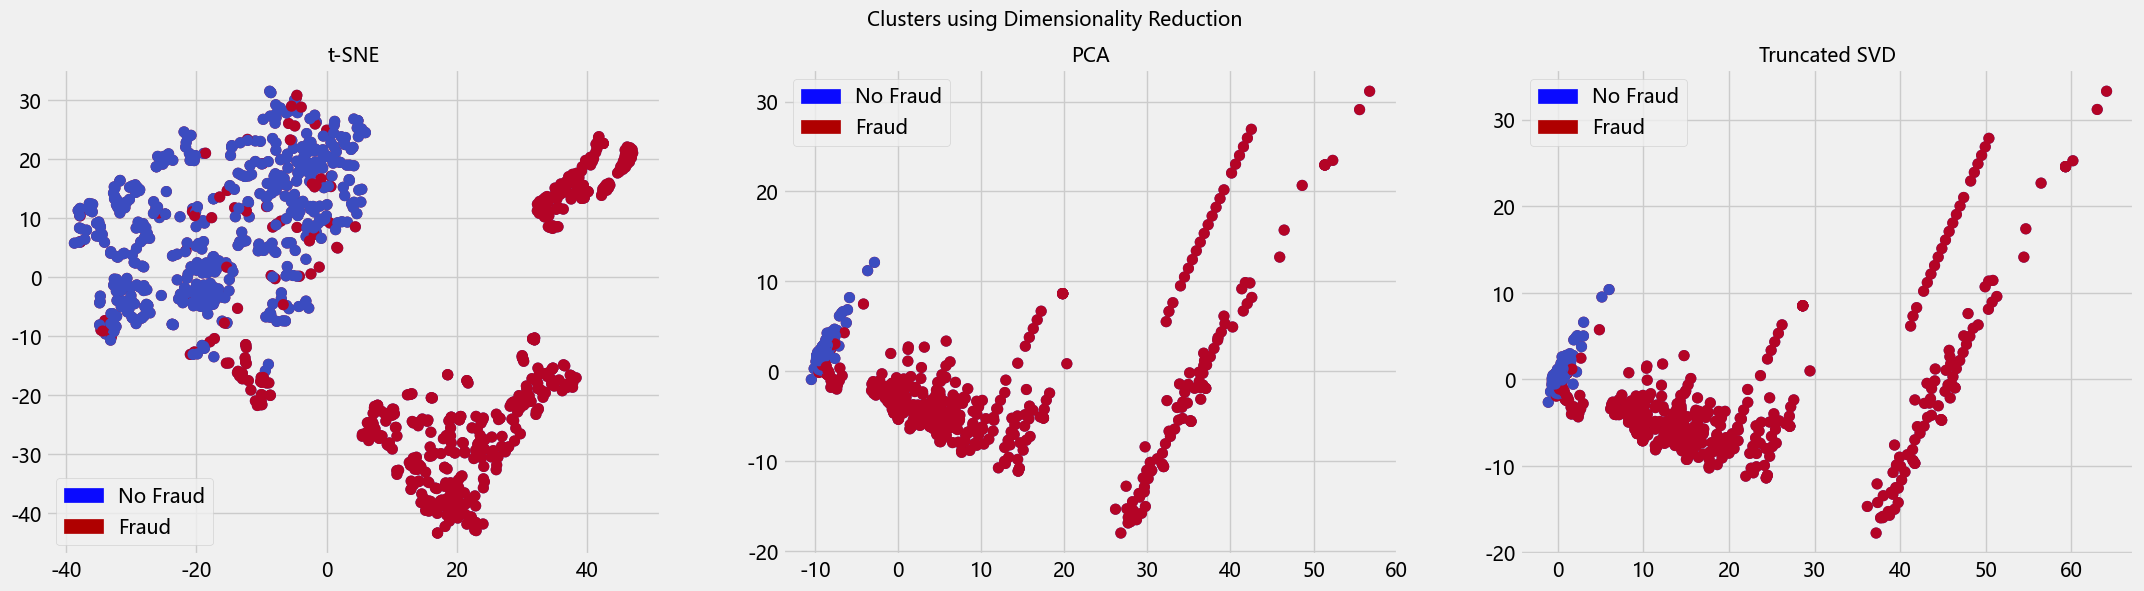

In [200]:
import matplotlib.patches as mpatches # 彩色补丁

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6)) # 创建一个 1 行 3 列的子图布局
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# 创建两个 Patch 对象，blue_patch 和 red_patch，分别用于在图例中表示 "No Fraud"（无欺诈）和 "Fraud"（欺诈）
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

#  cmap='coolwarm' 时，数据点将根据它们的值被映射到从冷色（蓝色）到暖色（红色）的渐变颜色上。这可以帮助可视化数据的分布和密度

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])
plt.show()


# 模型训练


## 样本不平衡解决方法
样本不平衡解决方法
样本不平衡常用的解决方法：本项目方案（1-欺诈 0-正常）我们需要对1-欺诈数据进行过采样

过采样（oversampling），增加正样本使得正、负样本数目接近，然后再进行学习。
欠采样（undersampling），去除一些负样本使得正、负样本数目接近，然后再进行学习
过采样方法具体操作使用SMOTE（Synthetic Minority Oversampling Technique）

SMOTE的基本原理
SMOTE（Synthetic Minority Oversampling Technique）: 合成少数类过采样技术。

具体可以参考： https://www.cnblogs.com/bonelee/p/8535045.html

针对python提供了SMOTE算法库（通过 pip install -U imbalanced-learn 进行算法包安装）

from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块339

In [203]:
data_df_new.shape

(284807, 19)

In [204]:
# 构建自变量和因变量
X = data_df_new[x_feature]
y = data_df_new["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])


样本个数：284807; 正样本占0.17%; 负样本占99.83%
特征维数： 18


In [206]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])


通过SMOTE方法平衡正负样本后
样本个数：568630; 正样本占50.00%; 负样本占50.00%
特征维数： 18


# 分类器进行训练

构建训练集和测试集

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size= 0.3,random_state=42)
# stratify='y'：这个参数确保分割是按照目标变量 y 进行的，这样可以保证每个类别在训练集和测试集中的比例与完整数据集中的比例相同

In [208]:
len(X_train),len(X_test)


(398041, 170589)

In [209]:
# 模型训练
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 构建逻辑回归分类器
lr.fit(X_train, y_train)

# 测试集预测
y_pred = lr.predict(X_test)

# 模型评估
from sklearn.metrics import confusion_matrix,classification_report
print('<--------Confusion Matrix-------->\n',confusion_matrix(y_test,y_pred))
print('<--------Classification Report-------->\n',classification_report(y_test,y_pred))


<--------Confusion Matrix-------->
 [[83090  2205]
 [ 8355 76939]]
<--------Classification Report-------->
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     85295
           1       0.97      0.90      0.94     85294

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



##  模型优化

模型调优采用网格搜索调优参数（grid search）-> 获取模型训练最佳参数

In [211]:
# 构建参数组合
param_grid = {'C': [0.1, 1, 10,100],# 一般经验10倍增加
                            'penalty': [ 'l1', 'l2']}

clf = GridSearchCV(LogisticRegression(),  param_grid, cv=5)
clf.fit(X_train, y_train)
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})
clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [213]:
lr = LogisticRegression(**clf.best_params_) # 构建逻辑回归分类器
lr.fit(X_train, y_train)

# 测试集预测
y_pred = lr.predict(X_test)

# 模型评估
from sklearn.metrics import confusion_matrix,classification_report
print('<--------Confusion Matrix-------->\n',confusion_matrix(y_test,y_pred))
print('<--------Classification Report-------->\n',classification_report(y_test,y_pred))

<--------Confusion Matrix-------->
 [[83090  2205]
 [ 8355 76939]]
<--------Classification Report-------->
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     85295
           1       0.97      0.90      0.94     85294

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



train_sizes: [ 39804 129363 218922 308481 398041]
train_scores: [[0.93947844 0.94121194 0.94379962 0.942041   0.93684052]
 [0.93869963 0.93858368 0.93944173 0.93900111 0.9366434 ]
 [0.93802359 0.93839358 0.93840272 0.9386037  0.93774495]
 [0.93783086 0.93864776 0.93838843 0.93831711 0.93760394]
 [0.93773255 0.9383355  0.93800639 0.93803151 0.93787323]]
test_scores: [[0.93994923 0.93814373 0.9415613  0.94070544 0.93812028]
 [0.93850131 0.93745787 0.93885303 0.93793269 0.93835476]
 [0.93862441 0.93769235 0.9384251  0.93816717 0.93861269]
 [0.93861269 0.93776855 0.93844269 0.93792097 0.93861855]
 [0.93870648 0.93765131 0.93843683 0.93786821 0.93872993]]


Text(0.5, 1.0, 'Learning Curves (lr C:10, penalty: l2})')

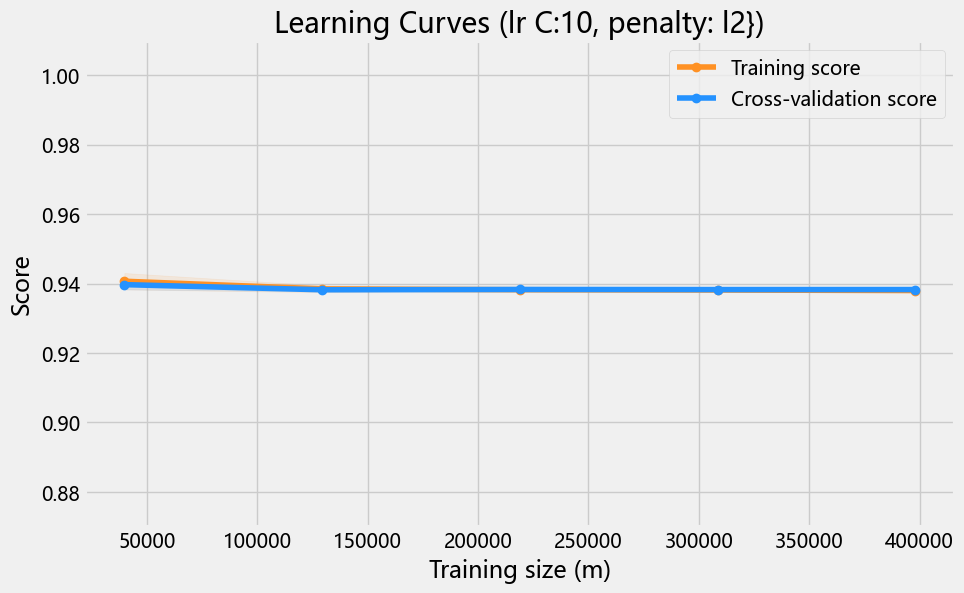

In [219]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ax1 = plt.subplots(1,1, figsize=(10,6), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    print('train_sizes:',train_sizes)
    print('train_scores:',train_scores)
    print('test_scores:',test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    return plt

title = "Learning Curves (lr C:10, penalty: l2})"

estimator = LogisticRegression(penalty='l2', C=10.0)# 提供的最优参数，训练模型查看是否过拟合

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
plt = plot_learning_curve(estimator,  X, y, (0.87, 1.01), cv=cv, n_jobs=4)  # SMOTE后的X ,y
plt.title(title)


In [216]:
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [218]:
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

## 混淆矩阵

In [232]:
import itertools
def plot_confusion_matrix(cm, classes,i,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label'+str(i))


In [222]:
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

y_pred_proba.shape: (170589, 2)
y_pred_proba: [[1.44e-14 1.00e+00]
 [9.68e-01 3.24e-02]
 [8.53e-01 1.47e-01]
 ...
 [2.38e-06 1.00e+00]
 [9.19e-01 8.08e-02]
 [9.81e-01 1.89e-02]]
y_test_predictions_high_recall: [ True False  True ...  True False False]
cnf_matrix [[65648 19647]
 [ 1362 83932]]
threshold:0.1,Recall metric in the testing dataset 0.9840317021126925->83932->85294 
y_test_predictions_high_recall: [ True False False ...  True False False]
cnf_matrix [[76944  8351]
 [ 3759 81535]]
threshold:0.2,Recall metric in the testing dataset 0.9559289047295237->81535->85294 
y_test_predictions_high_recall: [ True False False ...  True False False]
cnf_matrix [[80399  4896]
 [ 5834 79460]]
threshold:0.3,Recall metric in the testing dataset 0.9316012849672896->79460->85294 
y_test_predictions_high_recall: [ True False False ...  True False False]
cnf_matrix [[82123  3172]
 [ 7086 78208]]
threshold:0.4,Recall metric in the testing dataset 0.9169226440312331->78208->85294 
y_test_predictions

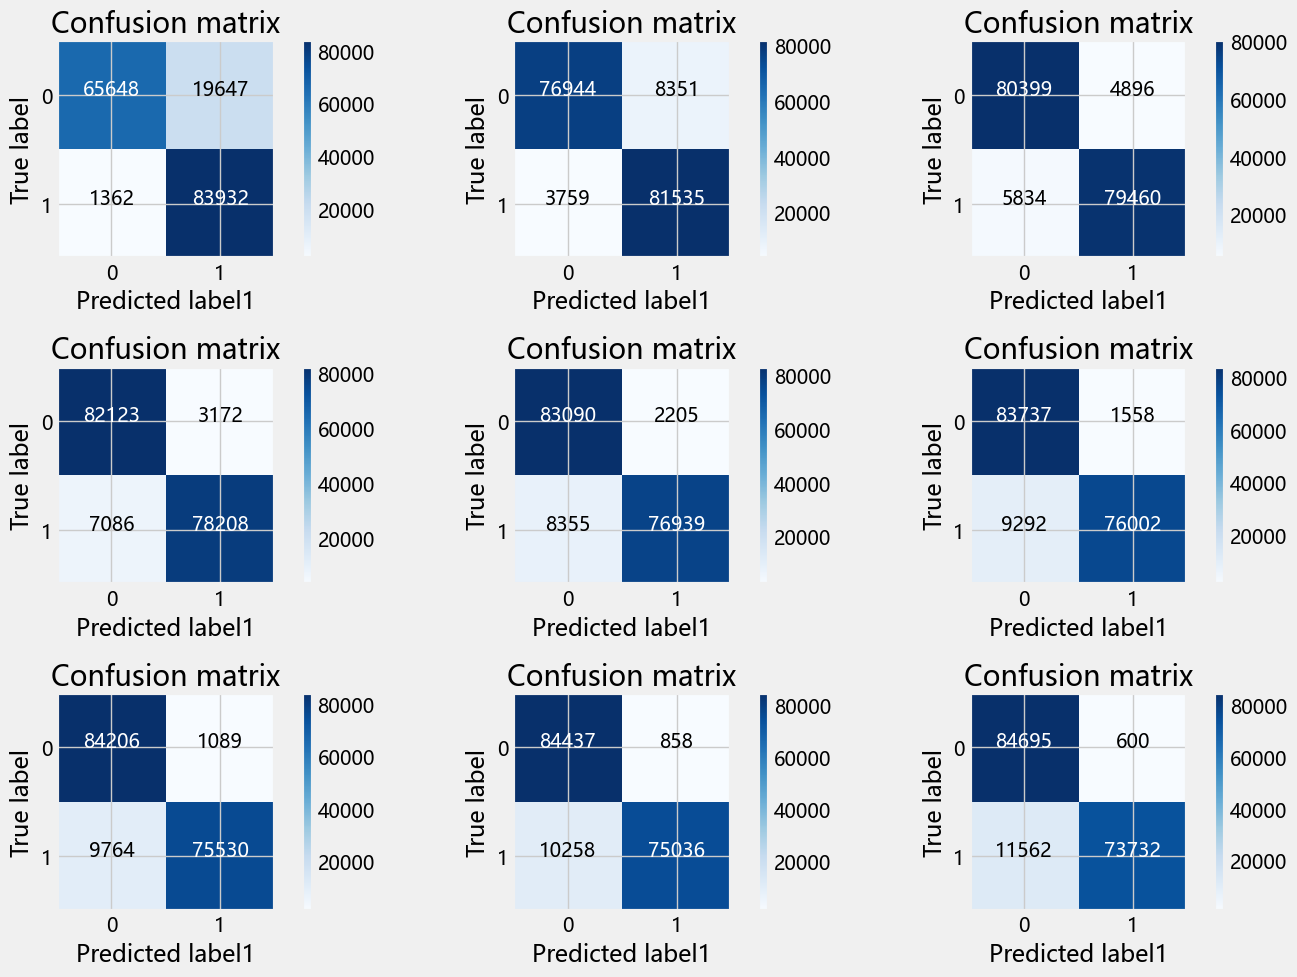

In [241]:

from sklearn.metrics import confusion_matrix

# 存储预测概率结果的变量。它将是一个二维数组，其中每一行代表一个测试样本，每一列代表该样本属于某个类别的概率。
y_pred_proba = clf.predict_proba(X_test)  #predict_prob 获得一个概率值  每一行预测 的结果 0 或者1 都给一个概率
print('y_pred_proba.shape:',y_pred_proba.shape)
print('y_pred_proba:',y_pred_proba)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值
plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    print('y_test_predictions_high_recall:',y_test_predictions_high_recall)

    plt.subplot(3,3,j)# 3 * 3 第三行和第三列的图，j表示第几个图表
    j += 1
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    print('cnf_matrix',cnf_matrix)
    np.set_printoptions(precision=2)
    
    x1 = cnf_matrix[1,1]# 正样本中预测也是正样本
    x2 = (cnf_matrix[1,0]+cnf_matrix[1,1])# 所有正样本
    print("threshold:{},Recall metric in the testing dataset {}->{}->{} ".format( i, x1/x2,x1,x2))
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix ,classes=class_names,i=i)


In [228]:
y_test.value_counts()

Class
0    85295
1    85294
Name: count, dtype: int64

predict_proba 方法: 这个方法是 scikit-learn 分类器的一个标准方法，它返回一个概率数组，其中每个元素是一个样本属于各个类别的概率。对于二分类问题，返回的数组形状为 (n_samples, 2)，其中 n_samples 是测试样本的数量。数组中的每一行代表一个样本，第一列是样本属于第一个类别的概率，第二列是样本属于第二个类别的概率。

In [238]:
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks

array([0, 1])

## 绘制PRC曲线

----------0.1----------
Recall [1.   0.98 0.  ]
precision [0.5  0.81 1.  ]
----------0.2----------
Recall [1.   0.96 0.  ]
precision [0.5  0.91 1.  ]
----------0.3----------
Recall [1.   0.93 0.  ]
precision [0.5  0.94 1.  ]
----------0.4----------
Recall [1.   0.92 0.  ]
precision [0.5  0.96 1.  ]
----------0.5----------
Recall [1.  0.9 0. ]
precision [0.5  0.97 1.  ]
----------0.6----------
Recall [1.   0.89 0.  ]
precision [0.5  0.98 1.  ]
----------0.7----------
Recall [1.   0.89 0.  ]
precision [0.5  0.99 1.  ]
----------0.8----------
Recall [1.   0.88 0.  ]
precision [0.5  0.99 1.  ]
----------0.9----------
Recall [1.   0.86 0.  ]
precision [0.5  0.99 1.  ]


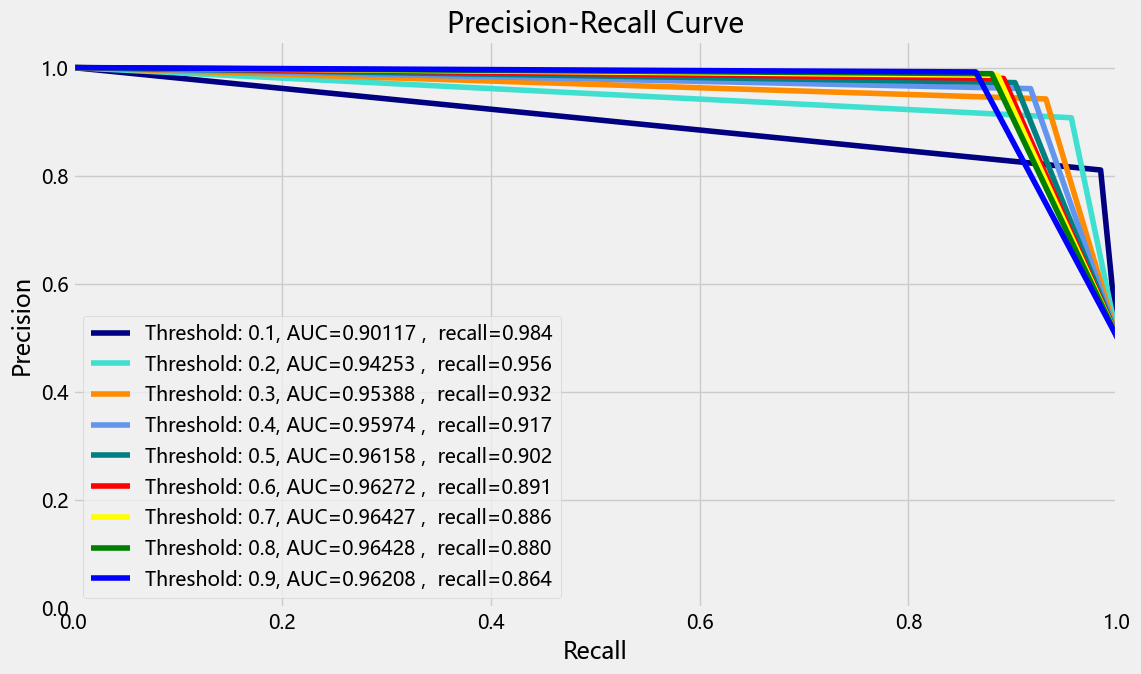

In [247]:
from itertools import cycle
from sklearn.metrics import precision_recall_curve

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #预测出来的概率值是否大于阈值  

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    print('----------{}----------'.format(i))
    print('Recall',recall)
    print('precision',precision)
    area = auc(recall, precision)# recall ,precision 组成的面积

    cm = confusion_matrix(y_test,y_test_predictions_prob)
    r = cm[1,1]/(cm[1,0] + cm[1,1])
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f ,  recall=%0.3f' %(i , area,r))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")


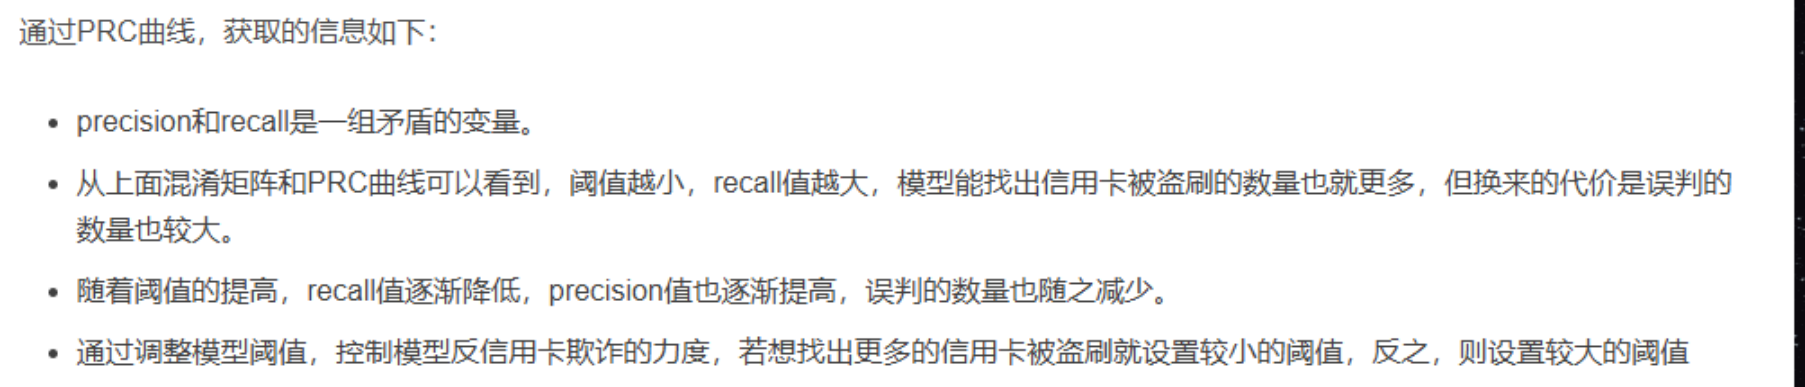

### 召回率
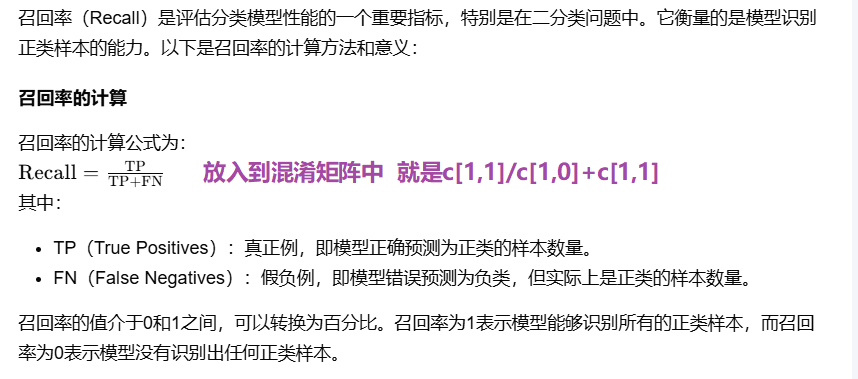

召回率的意义
识别正类的能力：召回率反映了模型识别正类样本的能力。在某些应用场景中，如疾病筛查或欺诈检测，召回率尤为重要，因为错过一个正类样本（假负例）可能带来严重后果。

不平衡数据集：在正负样本数量不平衡的数据集中，准确率（Accuracy）可能不是评估模型性能的最佳指标。在这种情况下，召回率提供了一个更有意义的性能度量，因为它专注于正类样本的识别。

精确率与召回率的权衡：精确率（Precision）和召回率之间存在权衡关系。提高精确率可能会降低召回率，反之亦然。在实际应用中，需要根据具体需求来平衡这两个指标。

模型选择和调优：召回率是模型选择和调优的重要依据。在某些情况下，可能需要一个高召回率的模型，即使这意味着牺牲一些精确率。召回率可以帮助我们理解模型在不同阈值下的表现，从而选择最合适的模型。

业务影响：在业务决策中，召回率可以帮助评估模型的潜在影响。例如，在客户流失预测中，高召回率意味着能够识别出更多的可能流失客户，从而采取预防措施。

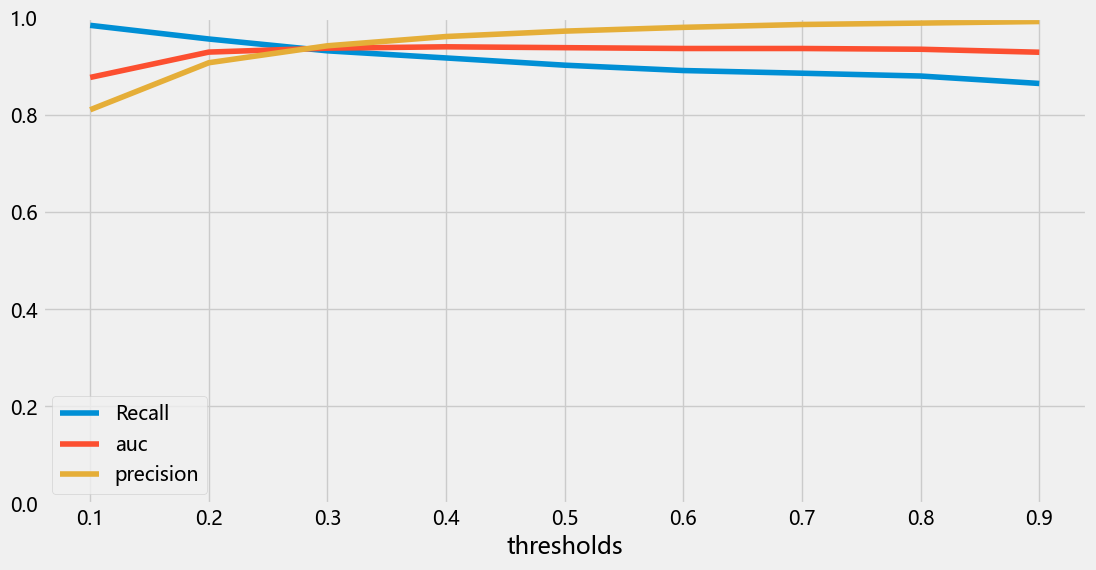

In [252]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
recalls = [] # 召回率
precisions = [] # 精确度
aucs = [] # 曲线下面积
y_pred_proba = clf.predict_proba(X_test)
for threshold in thresholds:
    y_ = y_pred_proba[:,1] >= threshold
    cm = confusion_matrix(y_test,y_)
    # TP/(TP + FN)
    recalls.append(cm[1,1]/(cm[1,0] + cm[1,1])) # 召回率，从真的癌症患者中找出来的比例，200,85个，42.5%
    # TP/(TP + FP)
    precisions.append(cm[1,1]/(cm[0,1] + cm[1,1])) # 精确率，找到癌症患者，100个，85个真的，15个没病，预测有病
    fpr,tpr,_ = roc_curve(y_test,y_)
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    
plt.figure(figsize=(12,6))
plt.plot(thresholds,recalls,label = 'Recall')
plt.plot(thresholds,aucs,label = 'auc')
plt.plot(thresholds,precisions,label = 'precision')
plt.legend()
plt.ylim([0,1])
plt.xlabel('thresholds')
plt.show()